# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.3.5
pandas version: 2.3.3
matplotlib version: 3.10.7
seaborn version: 0.13.2


In [4]:
pd.options.display.float_format = '{:.2f}'.format

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file
df = pd.read_parquet('data_NYC_Taxi/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

sampled_df = df.sample(frac=0.5, random_state=42)
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1520857 entries, 323412 to 2848555
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1520857 non-null  int64         
 1   tpep_pickup_datetime   1520857 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1520857 non-null  datetime64[us]
 3   passenger_count        1485079 non-null  float64       
 4   trip_distance          1520857 non-null  float64       
 5   RatecodeID             1485079 non-null  float64       
 6   store_and_fwd_flag     1485079 non-null  object        
 7   PULocationID           1520857 non-null  int64         
 8   DOLocationID           1520857 non-null  int64         
 9   payment_type           1520857 non-null  int64         
 10  fare_amount            1520857 non-null  float64       
 11  extra                  1520857 non-null  float64       
 12  mta_tax                15208

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

total_rows = 0
# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        
        print(f"Processing file: {file_name}")
        # Reading the current file
        monthly_df = pd.read_parquet(file_path)
        print(f"Shape of {file_name} dataframe:", monthly_df.shape)
        df_rows = monthly_df.shape[0]
        total_rows += df_rows

        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.day
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in range(1, 32):  # Assuming maximum 31 days in a month
            day_data = monthly_df[monthly_df['pickup_date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(0, 24):
                hourly_data = day_data[monthly_df['pickup_hour'] == hour]
                # Sample 5% of the hourly data randomly
                sampled_hourly_data = hourly_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sampled_hourly_data], ignore_index=True)
                
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        
        print(f"Processed file: {file_name}\n")
        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing file: 2023-1.parquet
Shape of 2023-1.parquet dataframe: (3041714, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-1.parquet

Processing file: 2023-10.parquet
Shape of 2023-10.parquet dataframe: (3485185, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-10.parquet

Processing file: 2023-11.parquet
Shape of 2023-11.parquet dataframe: (3302857, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-11.parquet

Processing file: 2023-12.parquet
Shape of 2023-12.parquet dataframe: (3333925, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-12.parquet

Processing file: 2023-2.parquet
Shape of 2023-2.parquet dataframe: (3374086, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-2.parquet

Processing file: 2023-3.parquet
Shape of 2023-3.parquet dataframe: (3275796, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-3.parquet

Processing file: 2023-4.parquet
Shape of 2023-4.parquet dataframe: (2792901, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-4.parquet

Processing file: 2023-5.parquet
Shape of 2023-5.parquet dataframe: (2889185, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-5.parquet

Processing file: 2023-6.parquet
Shape of 2023-6.parquet dataframe: (3258261, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-6.parquet

Processing file: 2023-7.parquet
Shape of 2023-7.parquet dataframe: (3481547, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-7.parquet

Processing file: 2023-8.parquet
Shape of 2023-8.parquet dataframe: (2875947, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-8.parquet

Processing file: 2023-9.parquet
Shape of 2023-9.parquet dataframe: (2817156, 19)


C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

Processed file: 2023-9.parquet



C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[monthly_df['pickup_hour'] == hour]
C:\Users\Rakshith\AppData\Local\Temp\ipykernel_37464\780574882.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_data = day_data[month

In [9]:
print("Total rows in dataset = ", total_rows)

Total rows in dataset =  37928560


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
os.chdir('../../')

In [11]:
# Store the df in csv/parquet
df.to_parquet('sampled_data.parquet', index=False)

In [12]:
df.shape

(1896420, 22)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file
df = pd.read_parquet('sampled_data.parquet')
df.shape

(1896420, 22)

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2023-01-01 00:31:50,2023-01-01 00:44:17,2.00,2.85,1.00,N,263,41,1,...,0.50,4.12,0.00,1.00,24.72,2.50,0.00,1,0,NaN
1,2,2023-01-01 00:10:50,2023-01-01 00:24:12,4.00,1.32,1.00,N,90,137,1,...,0.50,3.56,0.00,1.00,21.36,2.50,0.00,1,0,NaN
2,2,2023-01-01 00:25:37,2023-01-01 00:34:52,1.00,3.17,1.00,N,79,141,1,...,0.50,3.98,0.00,1.00,23.88,2.50,0.00,1,0,NaN
3,2,2023-01-01 00:27:26,2023-01-01 00:52:20,2.00,3.80,1.00,N,142,107,2,...,0.50,0.00,0.00,1.00,29.70,2.50,0.00,1,0,NaN
4,2,2023-01-01 00:59:15,2023-01-01 01:23:15,NaN,7.97,NaN,None,140,17,0,...,0.50,8.17,0.00,1.00,49.00,NaN,NaN,1,0,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(columns=['store_and_fwd_flag'], inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2023-01-01 00:31:50,2023-01-01 00:44:17,2.00,2.85,1.00,263,41,1,15.60,...,0.50,4.12,0.00,1.00,24.72,2.50,0.00,1,0,NaN
1,2,2023-01-01 00:10:50,2023-01-01 00:24:12,4.00,1.32,1.00,90,137,1,12.80,...,0.50,3.56,0.00,1.00,21.36,2.50,0.00,1,0,NaN
2,2,2023-01-01 00:25:37,2023-01-01 00:34:52,1.00,3.17,1.00,79,141,1,14.90,...,0.50,3.98,0.00,1.00,23.88,2.50,0.00,1,0,NaN
3,2,2023-01-01 00:27:26,2023-01-01 00:52:20,2.00,3.80,1.00,142,107,2,24.70,...,0.50,0.00,0.00,1.00,29.70,2.50,0.00,1,0,NaN
4,2,2023-01-01 00:59:15,2023-01-01 01:23:15,NaN,7.97,NaN,140,17,0,36.83,...,0.50,8.17,0.00,1.00,49.00,NaN,NaN,1,0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
df['Airport_fee'].value_counts(dropna=False)

Airport_fee
0.00     1535060
NaN       213357
1.75      121153
1.25       26835
-1.75         11
-1.25          3
1.00           1
Name: count, dtype: int64

In [18]:
df['airport_fee'].value_counts(dropna=False)

airport_fee
NaN      1747938
0.00      135528
1.25       12953
-1.25          1
Name: count, dtype: int64

In [19]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].combine_first(df['Airport_fee'])
df.drop(columns=['Airport_fee'], inplace=True)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
0,2,2023-01-01 00:31:50,2023-01-01 00:44:17,2.00,2.85,1.00,263,41,1,15.60,1.00,0.50,4.12,0.00,1.00,24.72,2.50,0.00,1,0
1,2,2023-01-01 00:10:50,2023-01-01 00:24:12,4.00,1.32,1.00,90,137,1,12.80,1.00,0.50,3.56,0.00,1.00,21.36,2.50,0.00,1,0
2,2,2023-01-01 00:25:37,2023-01-01 00:34:52,1.00,3.17,1.00,79,141,1,14.90,1.00,0.50,3.98,0.00,1.00,23.88,2.50,0.00,1,0
3,2,2023-01-01 00:27:26,2023-01-01 00:52:20,2.00,3.80,1.00,142,107,2,24.70,1.00,0.50,0.00,0.00,1.00,29.70,2.50,0.00,1,0
4,2,2023-01-01 00:59:15,2023-01-01 01:23:15,NaN,7.97,NaN,140,17,0,36.83,0.00,0.50,8.17,0.00,1.00,49.00,NaN,NaN,1,0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [20]:
# check where values of fare amount are negative
df[df['fare_amount']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour


Did you notice something different in the `RatecodeID` column for above records?

In [21]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount']<0]['RatecodeID'].value_counts()

Series([], Name: count, dtype: int64)

In [22]:
# Find which columns have negative values
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
VendorID,1896420.00,1.73,1.00,1.00,2.00,2.00,6.00,0.45
tpep_pickup_datetime,1896420,2023-07-02 19:32:35.870896,2001-01-01 00:06:49,2023-04-02 16:09:10.500000,2023-06-27 15:42:34,2023-10-06 19:36:21.750000,2024-01-01 00:01:34,NaN
tpep_dropoff_datetime,1896420,2023-07-02 19:50:01.577445,2001-01-01 15:42:11,2023-04-02 16:27:35.500000,2023-06-27 15:59:43.500000,2023-10-06 19:53:03.250000,2024-01-01 20:50:55,NaN
passenger_count,1831545.00,1.37,0.00,1.00,1.00,1.00,9.00,0.89
trip_distance,1896420.00,3.84,0.00,1.05,1.79,3.40,126360.46,127.19
RatecodeID,1831545.00,1.63,1.00,1.00,1.00,1.00,99.00,7.40
PULocationID,1896420.00,165.27,1.00,132.00,162.00,234.00,265.00,64.00
DOLocationID,1896420.00,164.04,1.00,114.00,162.00,234.00,265.00,69.80
payment_type,1896420.00,1.16,0.00,1.00,1.00,1.00,4.00,0.51
fare_amount,1896420.00,19.92,0.00,9.30,13.50,21.90,143163.45,105.54


In [23]:
# fix these negative values
negative_value_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in negative_value_columns:
    df[col] = df[col].abs()

In [24]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
VendorID,1896420.00,1.73,1.00,1.00,2.00,2.00,6.00,0.45
tpep_pickup_datetime,1896420,2023-07-02 19:32:35.870896,2001-01-01 00:06:49,2023-04-02 16:09:10.500000,2023-06-27 15:42:34,2023-10-06 19:36:21.750000,2024-01-01 00:01:34,NaN
tpep_dropoff_datetime,1896420,2023-07-02 19:50:01.577445,2001-01-01 15:42:11,2023-04-02 16:27:35.500000,2023-06-27 15:59:43.500000,2023-10-06 19:53:03.250000,2024-01-01 20:50:55,NaN
passenger_count,1831545.00,1.37,0.00,1.00,1.00,1.00,9.00,0.89
trip_distance,1896420.00,3.84,0.00,1.05,1.79,3.40,126360.46,127.19
RatecodeID,1831545.00,1.63,1.00,1.00,1.00,1.00,99.00,7.40
PULocationID,1896420.00,165.27,1.00,132.00,162.00,234.00,265.00,64.00
DOLocationID,1896420.00,164.04,1.00,114.00,162.00,234.00,265.00,69.80
payment_type,1896420.00,1.16,0.00,1.00,1.00,1.00,4.00,0.51
fare_amount,1896420.00,19.92,0.00,9.30,13.50,21.90,143163.45,105.54


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [25]:
# Find the proportion of missing values in each column
df.isna().mean()*100

VendorID                0.00
tpep_pickup_datetime    0.00
tpep_dropoff_datetime   0.00
passenger_count         3.42
trip_distance           0.00
RatecodeID              3.42
PULocationID            0.00
DOLocationID            0.00
payment_type            0.00
fare_amount             0.00
extra                   0.00
mta_tax                 0.00
tip_amount              0.00
tolls_amount            0.00
improvement_surcharge   0.00
total_amount            0.00
congestion_surcharge    3.42
airport_fee             3.42
pickup_date             0.00
pickup_hour             0.00
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [26]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print(df['passenger_count'].value_counts(dropna=False))

df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()[0])

passenger_count
1.00    1377338
2.00     277244
3.00      68969
NaN       64875
4.00      38547
0.00      29683
5.00      23875
6.00      15867
8.00         11
9.00          6
7.00          5
Name: count, dtype: int64


Did you find zeroes in passenger_count? Handle these.

In [27]:
df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1

df['passenger_count'].value_counts(dropna=False)

passenger_count
1.00    1471896
2.00     277244
3.00      68969
4.00      38547
5.00      23875
6.00      15867
8.00         11
9.00          6
7.00          5
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [28]:
# Fix missing values in 'RatecodeID'
print(df['RatecodeID'].value_counts(dropna=False))

df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

RatecodeID
1.00     1729347
2.00       71584
NaN        64875
99.00      10477
5.00       10293
3.00        6123
4.00        3718
6.00           3
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [29]:
# handle null values in congestion_surcharge
print(df['congestion_surcharge'].value_counts(dropna=False))

df['congestion_surcharge'].fillna(0, inplace=True)

congestion_surcharge
2.50    1690678
0.00     140866
NaN       64875
0.50          1
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [30]:
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              64875
pickup_date                  0
pickup_hour                  0
dtype: int64

In [31]:
# Handle any remaining missing values
df['RatecodeID'].fillna(1, inplace=True)
df['airport_fee'].fillna(0, inplace=True)

df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_date              0
pickup_hour              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [32]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
VendorID,1896420.00,1.73,1.00,1.00,2.00,2.00,6.00,0.45
tpep_pickup_datetime,1896420,2023-07-02 19:32:35.870896,2001-01-01 00:06:49,2023-04-02 16:09:10.500000,2023-06-27 15:42:34,2023-10-06 19:36:21.750000,2024-01-01 00:01:34,NaN
tpep_dropoff_datetime,1896420,2023-07-02 19:50:01.577445,2001-01-01 15:42:11,2023-04-02 16:27:35.500000,2023-06-27 15:59:43.500000,2023-10-06 19:53:03.250000,2024-01-01 20:50:55,NaN
passenger_count,1896420.00,1.37,1.00,1.00,1.00,1.00,9.00,0.86
trip_distance,1896420.00,3.84,0.00,1.05,1.79,3.40,126360.46,127.19
RatecodeID,1896420.00,1.61,1.00,1.00,1.00,1.00,99.00,7.27
PULocationID,1896420.00,165.27,1.00,132.00,162.00,234.00,265.00,64.00
DOLocationID,1896420.00,164.04,1.00,114.00,162.00,234.00,265.00,69.80
payment_type,1896420.00,1.16,0.00,1.00,1.00,1.00,4.00,0.51
fare_amount,1896420.00,19.92,0.00,9.30,13.50,21.90,143163.45,105.54


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [33]:
# remove passenger_count > 6
df = df[df['passenger_count']<=6]

In [34]:
# Continue with outlier handling

# Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
df = df[~((df['fare_amount']>300)&(df['trip_distance']<1))]

# Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df = df[~((df['fare_amount']==0)&(df['trip_distance']==0)&(df['PULocationID']!=df['DOLocationID']))]

# Entries where `trip_distance` is more than 250  miles.
df = df[~(df['trip_distance']>250)]

# Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[df['payment_type']!=0]

# Entries where `RatecodeID` is 99 (there is no RatecodeID 99 defined in the data dictionary)
df = df[df['RatecodeID']!=99]

In [35]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
VendorID,1820935.00,1.74,1.00,1.00,2.00,2.00,2.00,0.44
tpep_pickup_datetime,1820935,2023-07-01 18:48:28.467443,2001-01-01 00:06:49,2023-04-01 19:06:42.500000,2023-06-25 23:38:54,2023-10-05 18:25:36.500000,2024-01-01 00:01:34,NaN
tpep_dropoff_datetime,1820935,2023-07-01 19:05:42.161702,2001-01-01 15:42:11,2023-04-01 19:21:38.500000,2023-06-25 23:57:53,2023-10-05 18:43:38.500000,2024-01-01 20:50:55,NaN
passenger_count,1820935.00,1.39,1.00,1.00,1.00,1.00,6.00,0.88
trip_distance,1820935.00,3.43,0.00,1.05,1.78,3.34,204.86,4.53
RatecodeID,1820935.00,1.07,1.00,1.00,1.00,1.00,6.00,0.39
PULocationID,1820935.00,165.66,1.00,132.00,162.00,234.00,265.00,63.54
DOLocationID,1820935.00,164.52,1.00,114.00,162.00,234.00,265.00,69.66
payment_type,1820935.00,1.21,1.00,1.00,1.00,1.00,4.00,0.47
fare_amount,1820935.00,19.66,0.00,9.30,13.50,21.90,1375.00,18.24


In [36]:
df.shape

(1820935, 20)

In [37]:
# Do any columns need standardising?


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [38]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [39]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date # Extract date
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month # Extract month
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour # Extract hour
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.dayofweek # Extract day of week
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter # Extract quarter

In [40]:
df = df[df['trip_duration']>0]

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

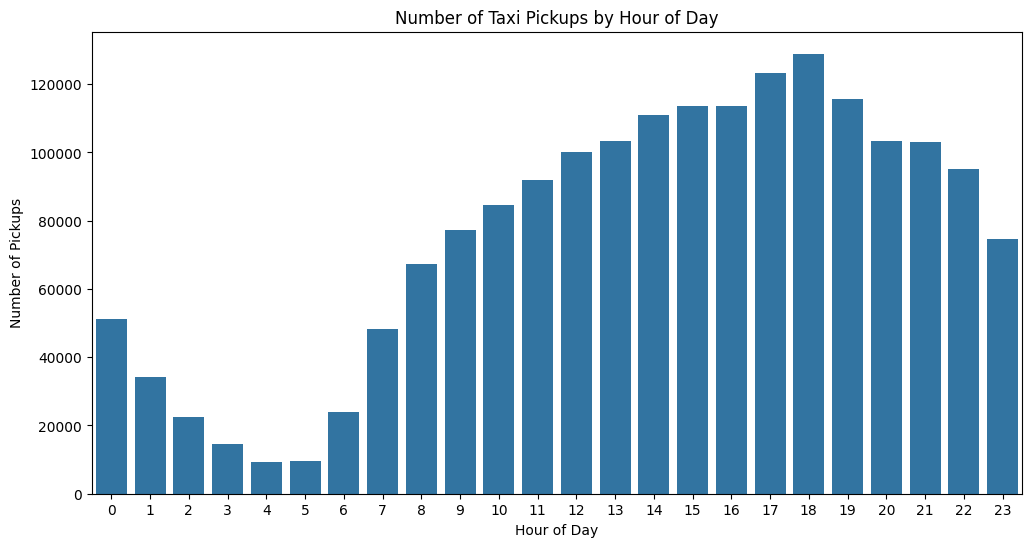

In [41]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(12,6))
sns.countplot(x='pickup_hour', data=df)
plt.title('Number of Taxi Pickups by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

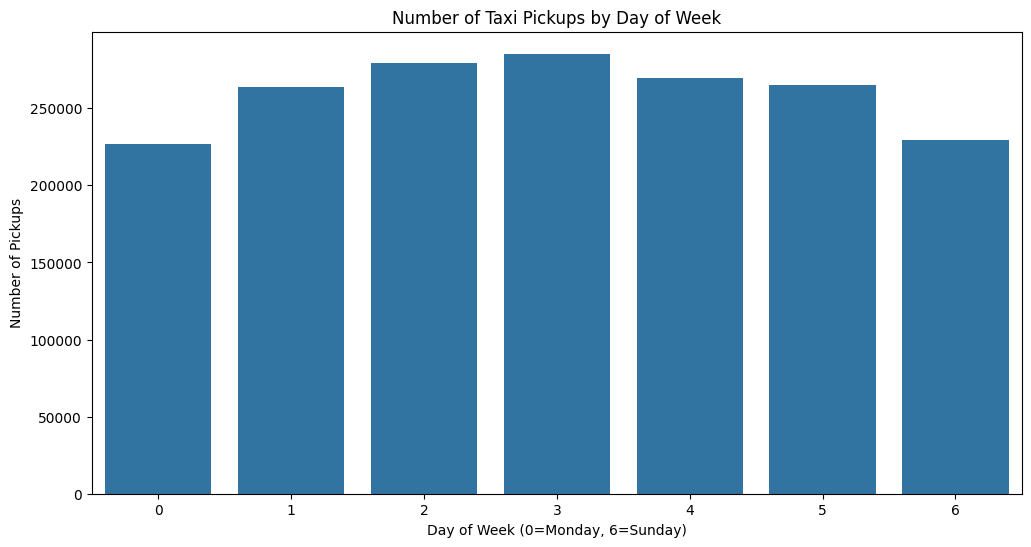

In [42]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(12,6))
sns.countplot(x='pickup_weekday', data=df)
plt.title('Number of Taxi Pickups by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.show()

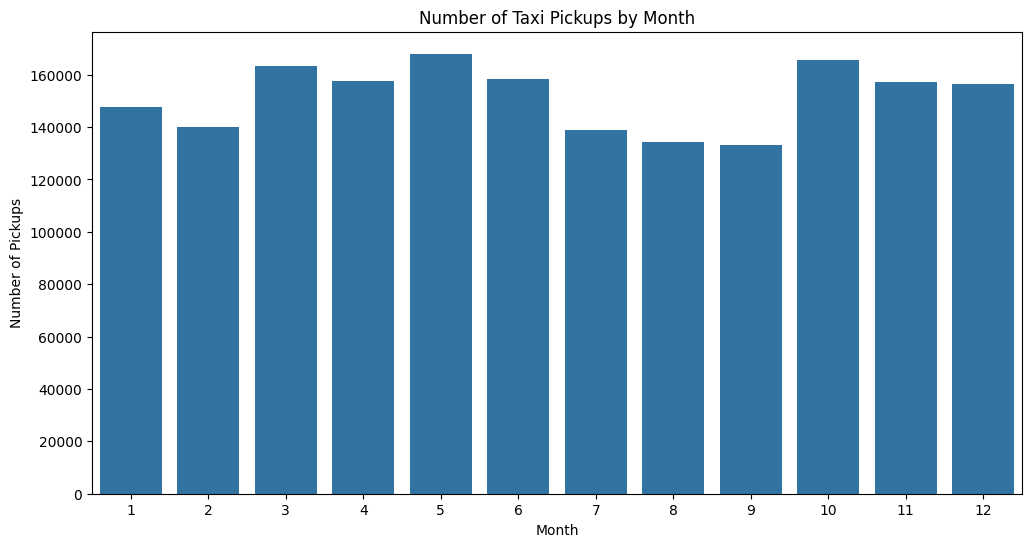

In [43]:
# Show the monthly trends in pickups
plt.figure(figsize=(12,6))
sns.countplot(x='pickup_month', data=df)
plt.title('Number of Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

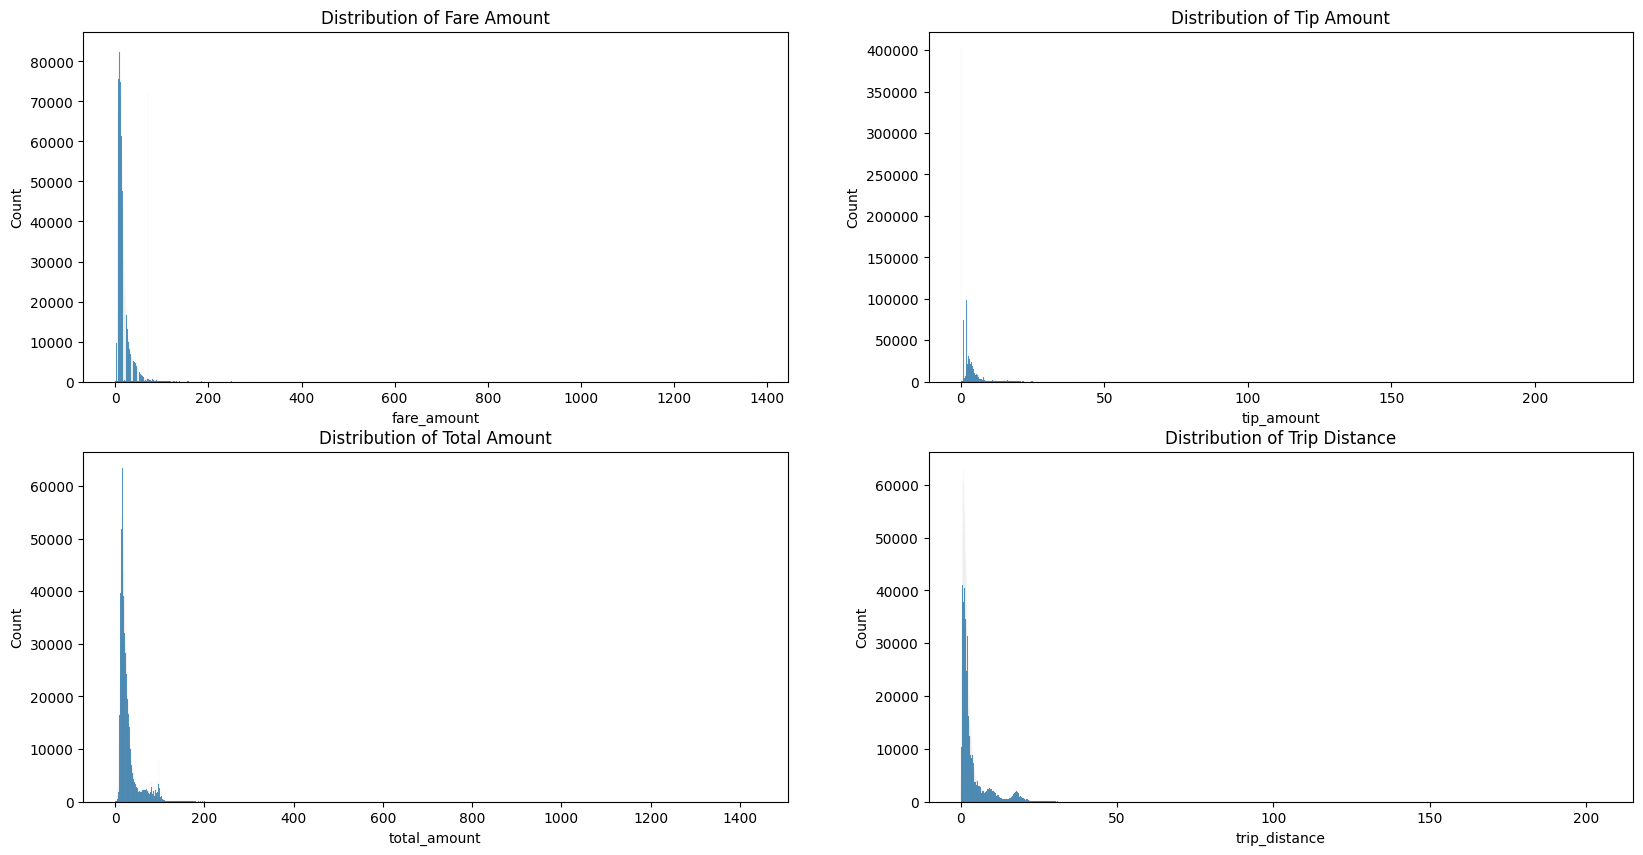

In [44]:
# Analyse the above parameters
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['fare_amount'])
plt.title('Distribution of Fare Amount')

plt.subplot(2, 2, 2)
sns.histplot(df['tip_amount'])
plt.title('Distribution of Tip Amount')

plt.subplot(2, 2, 3)
sns.histplot(df['total_amount'])
plt.title('Distribution of Total Amount')

plt.subplot(2, 2, 4)
sns.histplot(df['trip_distance'])
plt.title('Distribution of Trip Distance')

plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [45]:
# Create a df with non zero entries for the selected parameters.
nz_df = df[(df['fare_amount']>0) & (df['total_amount']>0) & (df['trip_distance']>0)]
# nz_df = df[(df['fare_amount']>0) & (df['tip_amount']>0) & (df['total_amount']>0) & (df['trip_distance']>0)]
nz_df.shape

(1798774, 24)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

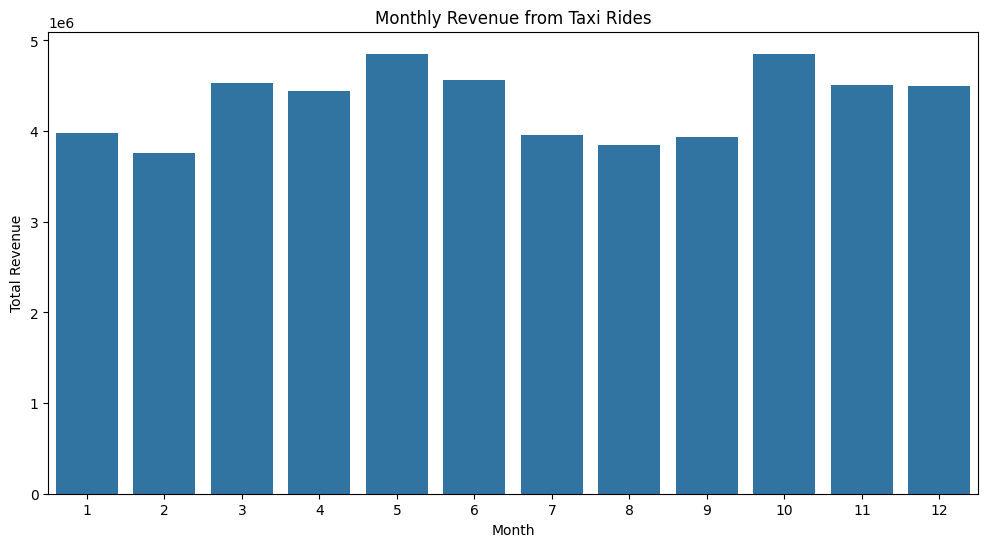

In [46]:
# Group data by month and analyse monthly revenue
plt.figure(figsize=(12,6)) 
monthly_revenue = nz_df.groupby('pickup_month')['total_amount'].sum().reset_index()
sns.barplot(x='pickup_month', y='total_amount', data=monthly_revenue)
plt.title('Monthly Revenue from Taxi Rides')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

   pickup_quarter  total_amount  proportion
0               1   12259492.13        0.24
1               2   13850772.37        0.27
2               3   11745655.56        0.23
3               4   13860524.96        0.27


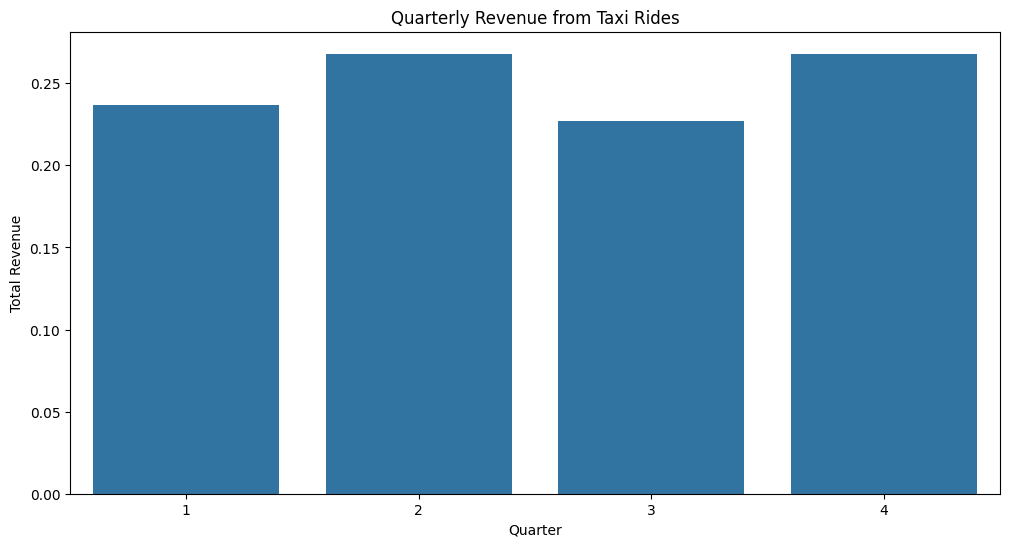

In [47]:
# Calculate proportion of each quarter
quarterly_revenue = nz_df.groupby('pickup_quarter')['total_amount'].sum().reset_index()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()
print(quarterly_revenue.head())

plt.figure(figsize=(12,6))
sns.barplot(x='pickup_quarter', y='proportion', data=quarterly_revenue)
plt.title('Quarterly Revenue from Taxi Rides')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

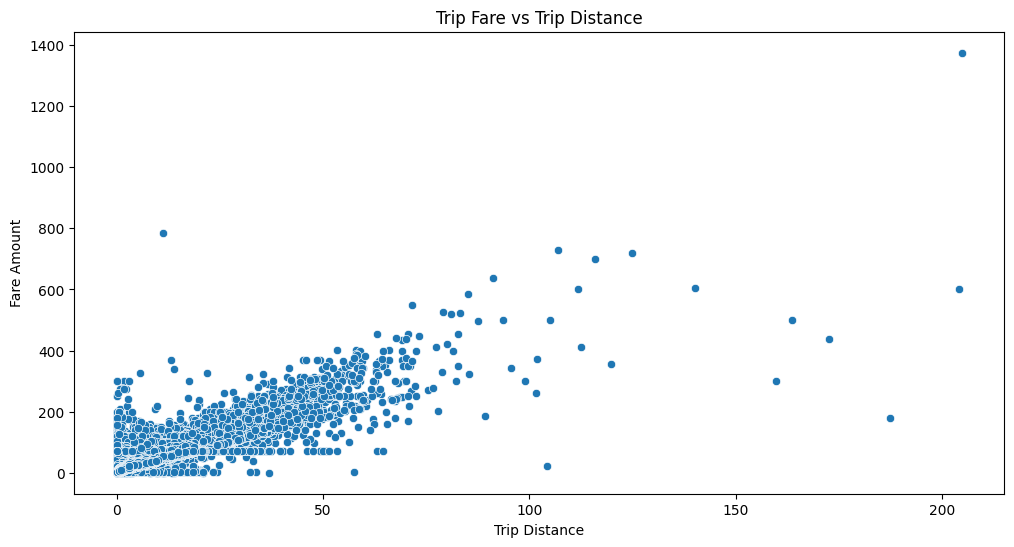

In [48]:
# Show how trip fare is affected by distance
plt.figure(figsize=(12,6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=nz_df)
plt.title('Trip Fare vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

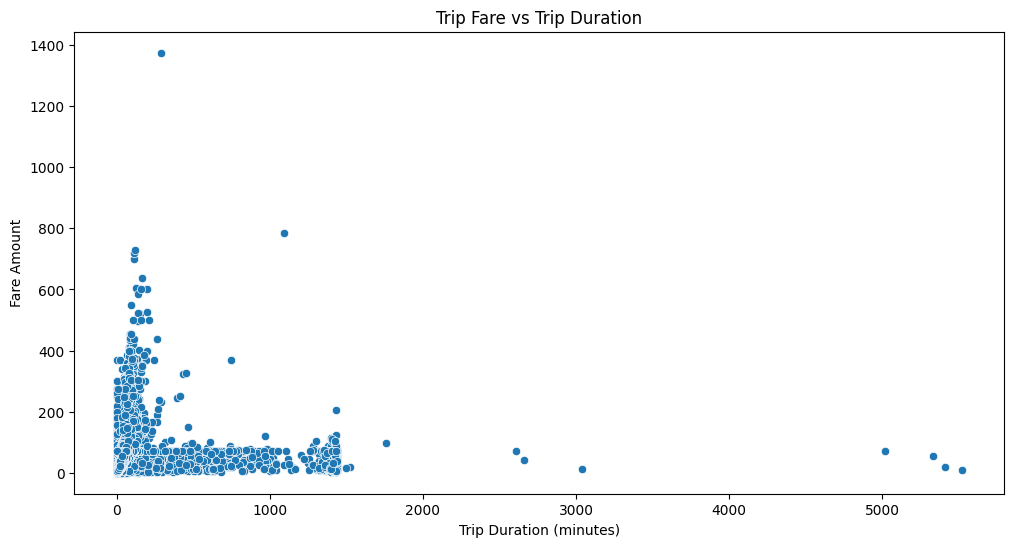

In [49]:
# Show relationship between fare and trip duration
plt.figure(figsize=(12,6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=nz_df)
plt.title('Trip Fare vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.show()

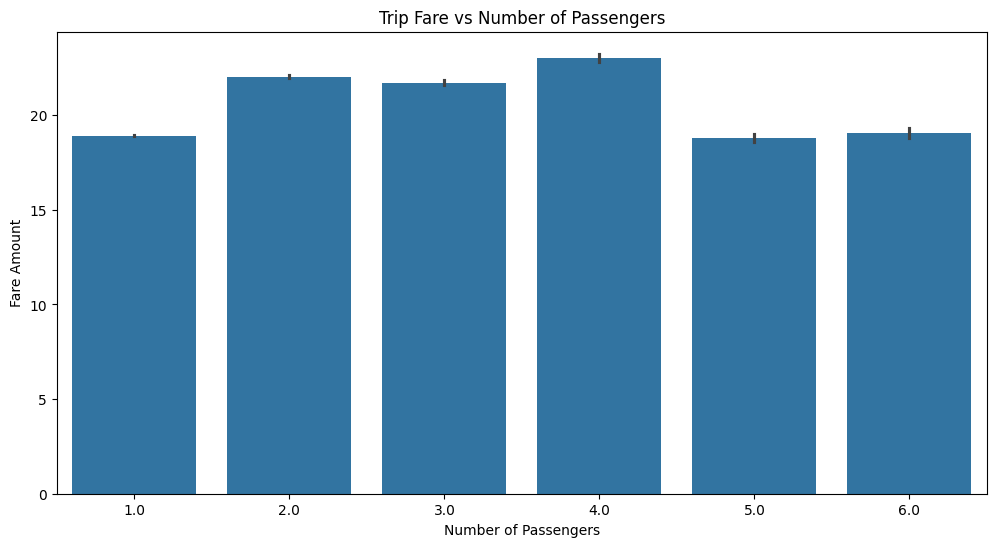

In [50]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(12,6))
sns.barplot(x='passenger_count', y='fare_amount', data=nz_df)
plt.title('Trip Fare vs Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.show()

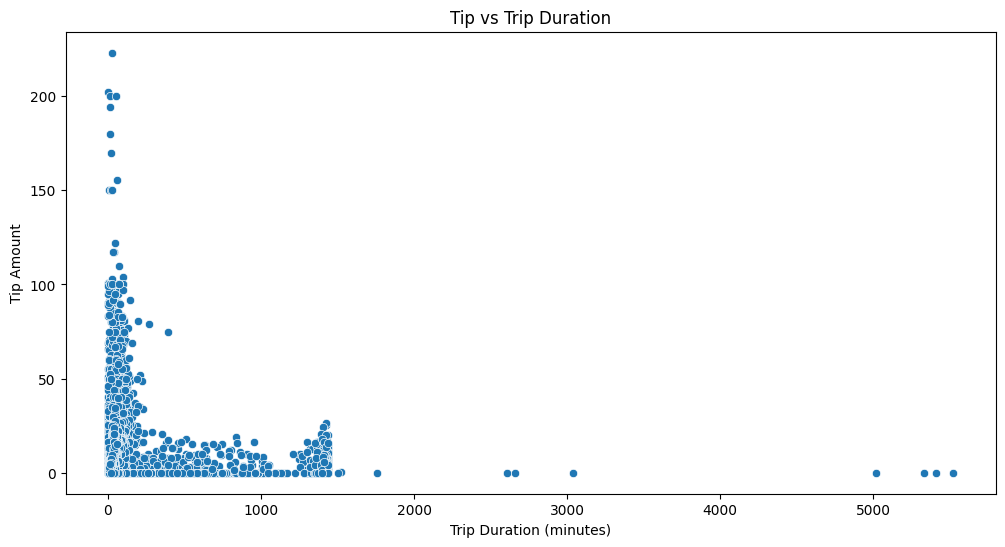

In [51]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12,6))
sns.scatterplot(x='trip_duration', y='tip_amount', data=nz_df)
plt.title('Tip vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Tip Amount')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

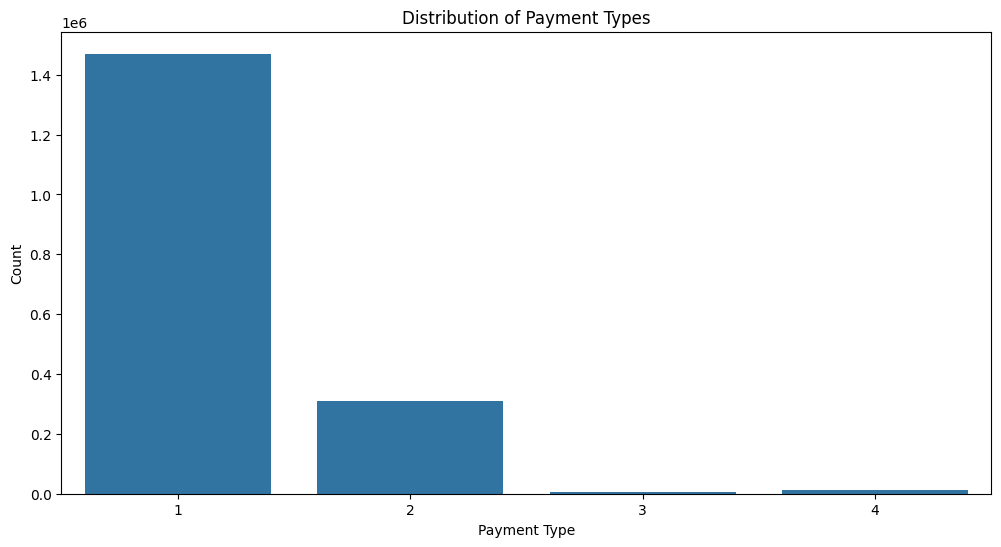

In [52]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize=(12,6))
sns.countplot(x='payment_type', data=nz_df)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [53]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [54]:
# import geopandas as gpd
import geopandas as gpd

shapefiles = os.listdir('data_NYC_Taxi/taxi_zones')

for file in shapefiles:
    if file.endswith('.shp'):
        shapefile_path = os.path.join('data_NYC_Taxi/taxi_zones/', file)
        print(f"Shapefile found: {shapefile_path}")
# Read the shapefile using geopandas
zones = gpd.read_file(shapefile_path)# read the .shp file using gpd
zones.head()

Shapefile found: data_NYC_Taxi/taxi_zones/taxi_zones.shp


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.12,0.00,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.43,0.00,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.08,0.00,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.04,0.00,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.09,0.00,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

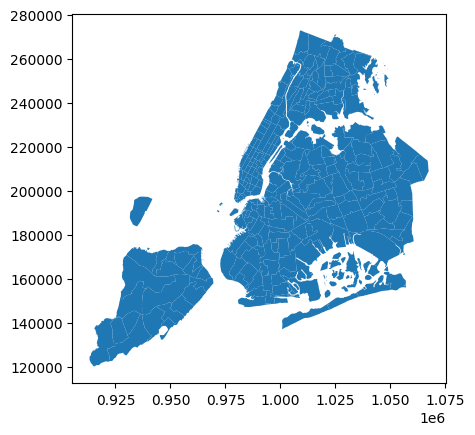

In [55]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [56]:
# Merge zones and trip records using locationID and PULocationID
zone_data = nz_df.merge(zones[['LocationID','zone']], left_on='PULocationID', right_on='LocationID', how='left')
zone_data.rename(columns={'zone': 'pickup_zone'}, inplace=True)
zone_data.drop(columns=['LocationID'], inplace=True)

zone_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,trip_duration,pickup_month,pickup_weekday,pickup_quarter,pickup_zone
0,2,2023-01-01 00:31:50,2023-01-01 00:44:17,2.00,2.85,1.00,263,41,1,15.60,...,24.72,2.50,0.00,2023-01-01,0,12.45,1,6,1,Yorkville West
1,2,2023-01-01 00:10:50,2023-01-01 00:24:12,4.00,1.32,1.00,90,137,1,12.80,...,21.36,2.50,0.00,2023-01-01,0,13.37,1,6,1,Flatiron
2,2,2023-01-01 00:25:37,2023-01-01 00:34:52,1.00,3.17,1.00,79,141,1,14.90,...,23.88,2.50,0.00,2023-01-01,0,9.25,1,6,1,East Village
3,2,2023-01-01 00:27:26,2023-01-01 00:52:20,2.00,3.80,1.00,142,107,2,24.70,...,29.70,2.50,0.00,2023-01-01,0,24.90,1,6,1,Lincoln Square East
4,1,2023-01-01 00:55:02,2023-01-01 00:59:57,1.00,0.60,1.00,237,237,1,6.50,...,13.80,2.50,0.00,2023-01-01,0,4.92,1,6,1,Upper East Side South


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [57]:
# Group data by location and calculate the number of trips
zone_trips = zone_data.groupby('pickup_zone').size().reset_index(name='num_trips').sort_values(by='num_trips', ascending=False)
zone_trips.head()

,pickup_zone,num_trips
115,JFK Airport,94859
222,Upper East Side South,86398
148,Midtown Center,85375
221,Upper East Side North,77038
149,Midtown East,65237


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [58]:
# Merge trip counts back to the zones GeoDataFrame
zones_map = zones.merge(zone_trips, left_on='zone', right_on='pickup_zone', how='left')
zones_map.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,pickup_zone,num_trips
0,1,0.12,0.00,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",Newark Airport,46.00
1,2,0.43,0.00,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",Jamaica Bay,2.00
2,3,0.08,0.00,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN,NaN
3,4,0.04,0.00,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",Alphabet City,1778.00
4,5,0.09,0.00,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,NaN


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

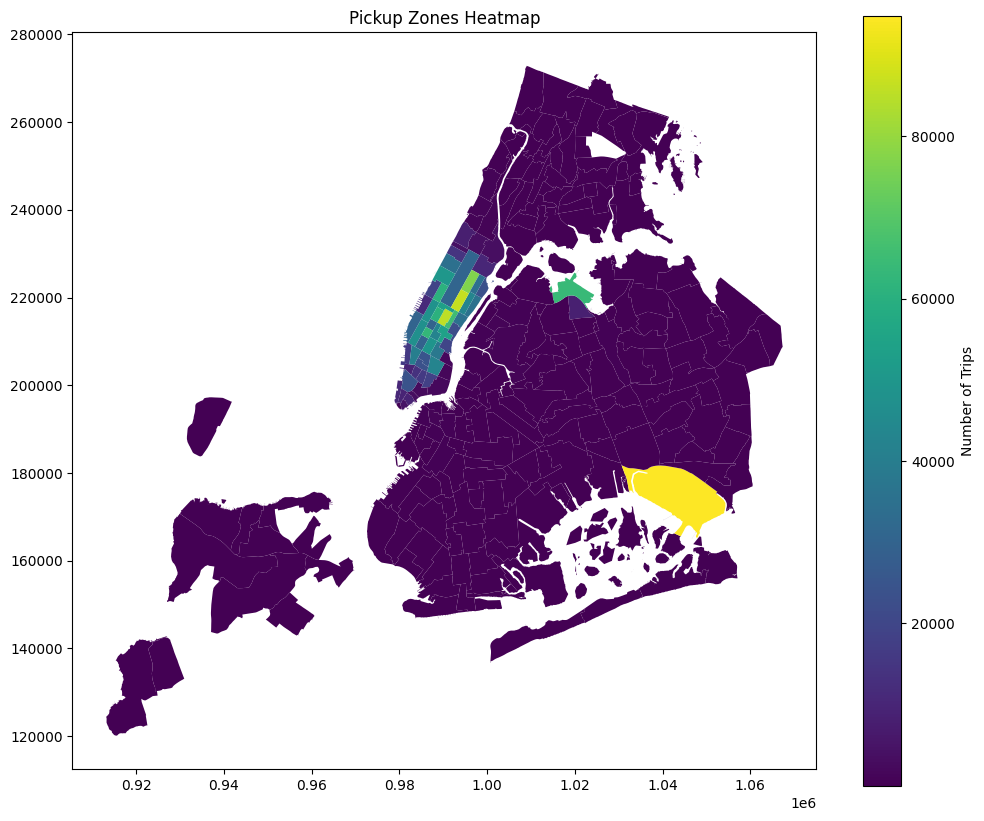

In [59]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12,10))
zones_map.plot(column='num_trips', ax=ax, legend=True, legend_kwds = {'label': "Number of Trips", 'orientation': "vertical"})
plt.title("Pickup Zones Heatmap")
# Plot the map and display it
plt.show()


In [60]:
# can you try displaying the zones DF sorted by the number of trips?
zones_map.sort_values('num_trips', ascending=False).head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,pickup_zone,num_trips
131,132,0.25,0.00,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",JFK Airport,94859.00
236,237,0.04,0.00,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",Upper East Side South,86398.00
160,161,0.04,0.00,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",Midtown Center,85375.00
235,236,0.04,0.00,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",Upper East Side North,77038.00
161,162,0.04,0.00,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",Midtown East,65237.00


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [61]:
# Find routes which have the slowest speeds at different times of the day
zone_data = zone_data.merge(zones[['LocationID','zone']], left_on='DOLocationID', right_on='LocationID', how='left')
zone_data.rename(columns={'zone': 'dropoff_zone'}, inplace=True)
zone_data.drop(columns=['LocationID'], inplace=True)

zone_df = zone_data
zone_df['speed_mph'] = zone_df['trip_distance']/(zone_df['trip_duration']/60)

route_speed = zone_df.groupby(['pickup_zone', 'dropoff_zone', 'pickup_hour'])['speed_mph'].mean().reset_index()

route_speed.sort_values('speed_mph').head()    

,pickup_zone,dropoff_zone,pickup_hour,speed_mph
82440,Randalls Island,Randalls Island,15,0.00
94119,Two Bridges/Seward Park,Downtown Brooklyn/MetroTech,13,0.01
56140,Lincoln Square East,Lincoln Square East,5,0.02
111328,Woodhaven,Woodhaven,1,0.03
29604,Garment District,Astoria,8,0.04


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

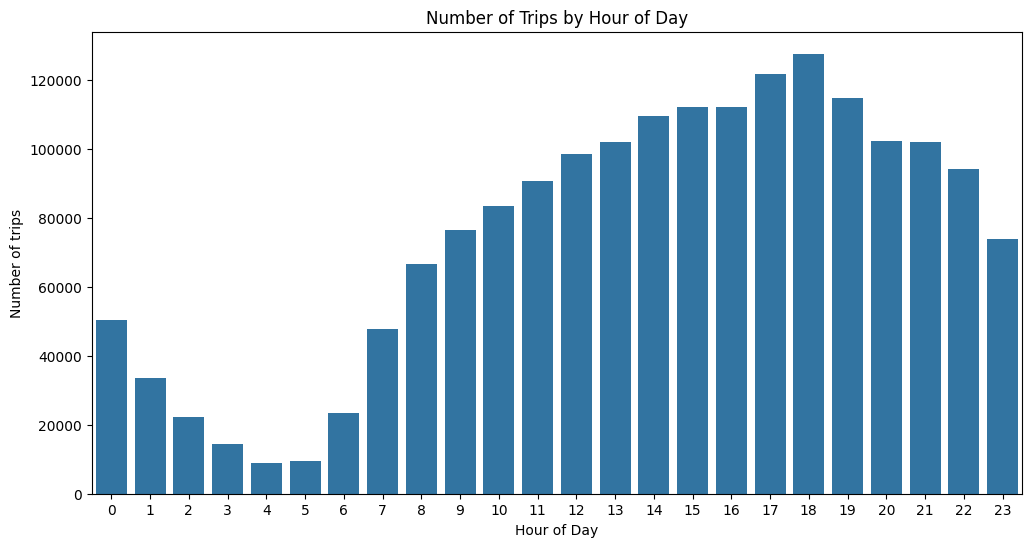

In [62]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=(12,6))
sns.countplot(x='pickup_hour', data=zone_data)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of trips')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

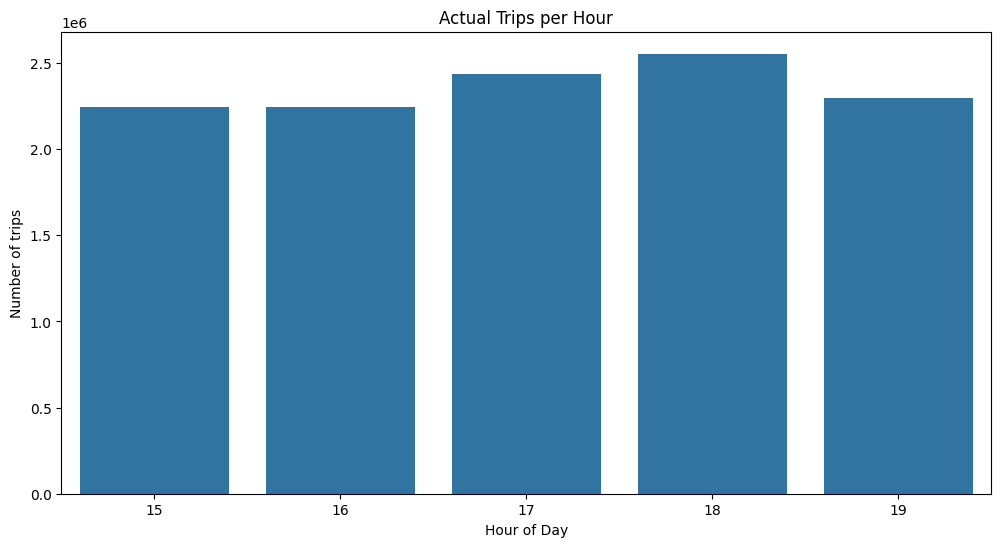

In [63]:
# Scale up the number of trips
hourly_trips = zone_data.groupby('pickup_hour').size()

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
actual_hourly_trips = hourly_trips/sample_fraction

actual_hourly_trips = actual_hourly_trips.reset_index(name='num_trips').sort_values(by='num_trips', ascending=False).head()

plt.figure(figsize=(12,6))
sns.barplot(data=actual_hourly_trips, x='pickup_hour', y='num_trips')
plt.title('Actual Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of trips')
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

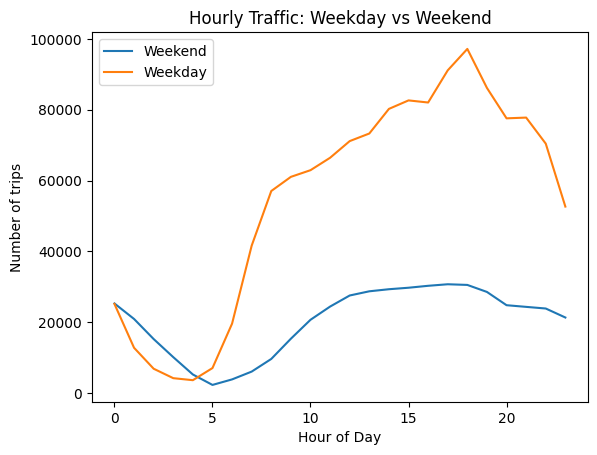

In [64]:
# Compare traffic trends for the week days and weekends
zone_data['is_weekend'] = zone_data['pickup_weekday'] >= 5

weekend_hourly = zone_data[zone_data['is_weekend']==True].groupby('pickup_hour').size()
weekday_hourly = zone_data[zone_data['is_weekend']==False].groupby('pickup_hour').size()

plt.plot(weekend_hourly.index, weekend_hourly.values, label='Weekend')
plt.plot(weekday_hourly.index, weekday_hourly.values, label='Weekday')
plt.title('Hourly Traffic: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of trips')
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [65]:
# Find top 10 pickup and dropoff zones
top_pickup_zones = zone_data.groupby(['pickup_hour','pickup_zone']).size().reset_index(name='num_trips').sort_values(by='num_trips', ascending=False)

top_pickup_zones.head(10)

,pickup_hour,pickup_zone,num_trips
2726,18,Midtown Center,7393
2582,17,Midtown Center,7156
2399,16,JFK Airport,6641
3304,22,JFK Airport,6618
2424,16,Midtown Center,6617
2236,15,JFK Airport,6584
2151,14,Upper East Side South,6543
2309,15,Upper East Side South,6541
2775,18,Upper East Side South,6529
2627,17,Upper East Side South,6529


In [66]:
zone_data['dropoff_hour'] = zone_data['tpep_dropoff_datetime'].dt.hour

top_dropoff_zones = zone_data.groupby(['dropoff_hour','dropoff_zone']).size().reset_index(name='num_trips').sort_values(by='num_trips', ascending=False)

top_dropoff_zones.head(10)

,dropoff_hour,dropoff_zone,num_trips
4454,18,Upper East Side South,6259
3721,15,Upper East Side North,6229
2992,12,Upper East Side South,6074
4453,18,Upper East Side North,6070
3722,15,Upper East Side South,5869
3475,14,Upper East Side North,5837
4208,17,Upper East Side North,5751
3963,16,Upper East Side North,5690
3476,14,Upper East Side South,5626
3237,13,Upper East Side South,5537


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [67]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_zones = top_pickup_zones.groupby('pickup_zone')['num_trips'].sum().reset_index()
pickup_zones.rename(columns={'pickup_zone': 'zone', 'num_trips': 'pickup_trips'}, inplace=True)

dropoff_zones = top_dropoff_zones.groupby('dropoff_zone')['num_trips'].sum().reset_index()
dropoff_zones.rename(columns={'num_trips': 'dropoff_trips'}, inplace=True)

pudo_ratio = pickup_zones.merge(dropoff_zones[['dropoff_zone','dropoff_trips']], left_on='zone', right_on='dropoff_zone', how='inner')
pudo_ratio['ratio'] = pudo_ratio['pickup_trips']/pudo_ratio['dropoff_trips']
pudo_ratio.drop(columns=['dropoff_zone'], inplace=True)

top10 = pudo_ratio.sort_values(by='ratio', ascending=False).head(10)
bottom10 = pudo_ratio.sort_values(by='ratio').head(10)

In [68]:
top10

,zone,pickup_trips,dropoff_trips,ratio
63,East Elmhurst,8194,852,9.62
115,JFK Airport,95044,19344,4.91
125,LaGuardia Airport,63866,21816,2.93
173,Penn Station/Madison Sq West,62937,39788,1.58
37,Central Park,30585,22206,1.38
100,Greenwich Village South,23971,17413,1.38
232,West Village,40143,30245,1.33
149,Midtown East,65241,51833,1.26
148,Midtown Center,85383,71015,1.20
91,Garment District,29906,25079,1.19


In [69]:
bottom10

,zone,pickup_trips,dropoff_trips,ratio
10,Bay Terrace/Fort Totten,1,181,0.01
126,Laurelton,2,320,0.01
187,Rockaway Park,1,158,0.01
211,Sunset Park East,2,272,0.01
165,Ocean Parkway South,1,135,0.01
160,Newark Airport,46,5153,0.01
108,Hollis,1,109,0.01
103,Hammels/Arverne,1,104,0.01
64,East Flatbush/Farragut,3,298,0.01
26,Bronxdale,1,94,0.01


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [70]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = [23, 0, 1, 2, 3, 4]
night_df = zone_data[zone_data['pickup_hour'].isin(night_hours)]
day_df = zone_data[~(zone_data['pickup_hour'].isin(night_hours))]

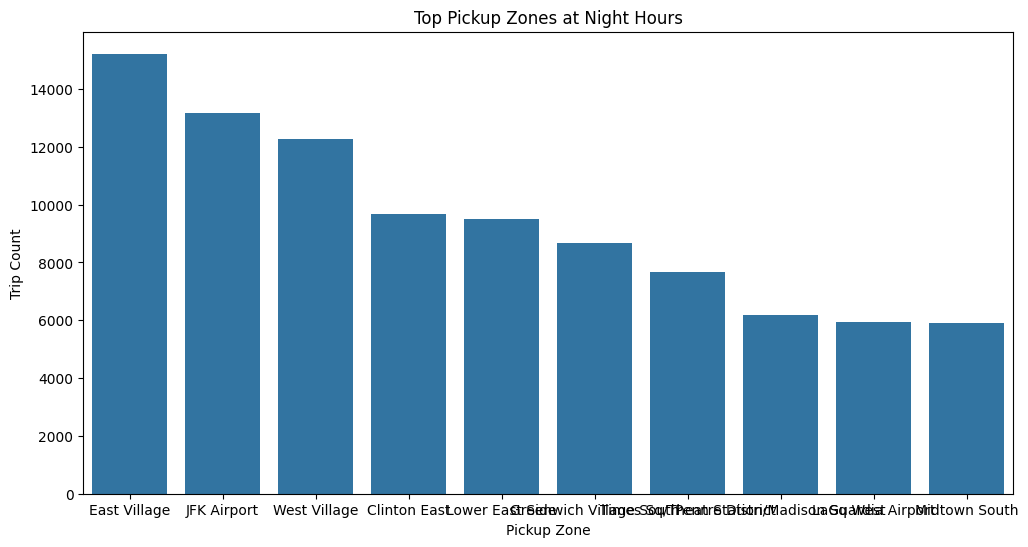

In [71]:
top_night_pickup = night_df['pickup_zone'].value_counts().reset_index().head(10)

plt.figure(figsize=(12,6))
sns.barplot(top_night_pickup, x='pickup_zone', y='count')
plt.title('Top Pickup Zones at Night Hours')
plt.xlabel('Pickup Zone')
plt.ylabel('Trip Count')
plt.show()

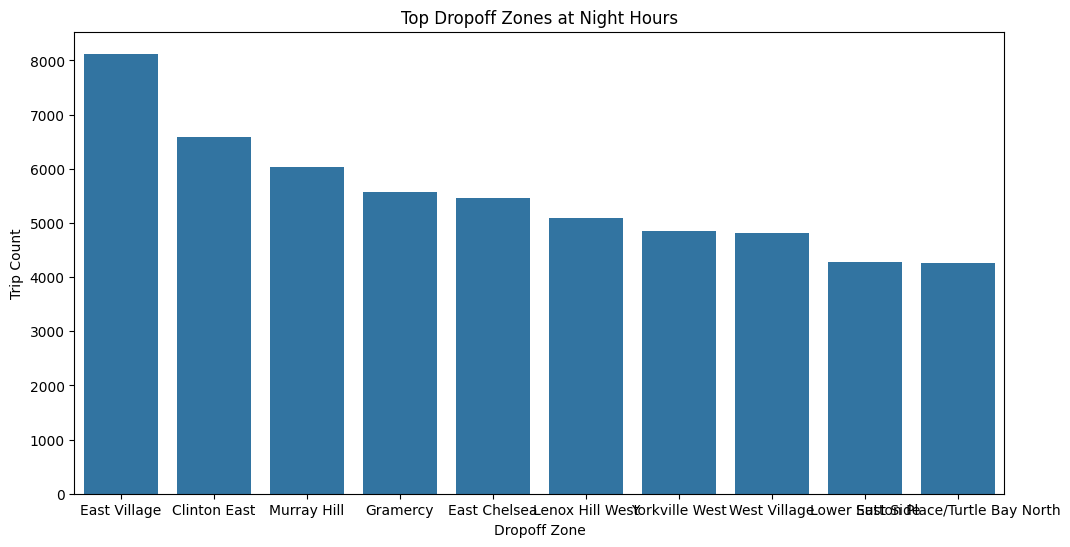

In [72]:
top_night_dropoff = night_df['dropoff_zone'].value_counts().reset_index().head(10)

plt.figure(figsize=(12,6))
sns.barplot(top_night_dropoff, x='dropoff_zone', y='count')
plt.title('Top Dropoff Zones at Night Hours')
plt.xlabel('Dropoff Zone')
plt.ylabel('Trip Count')
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

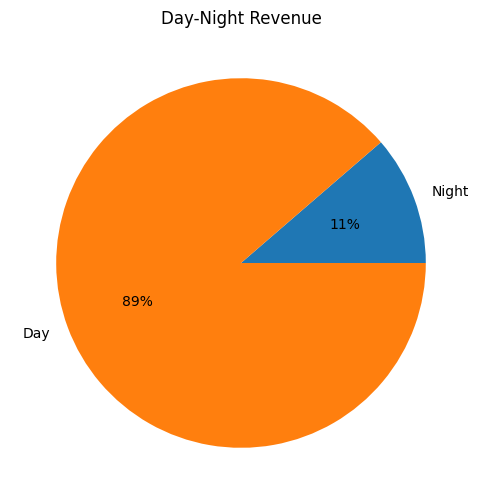

In [73]:
# Filter for night hours (11 PM to 5 AM)
revenue = pd.Series([night_df['total_amount'].sum(), day_df['total_amount'].sum()], index=['Night','Day'])
plt.figure(figsize=(6,6))
plt.pie(revenue, labels=revenue.index, autopct='%.0f%%')
plt.title("Day-Night Revenue")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

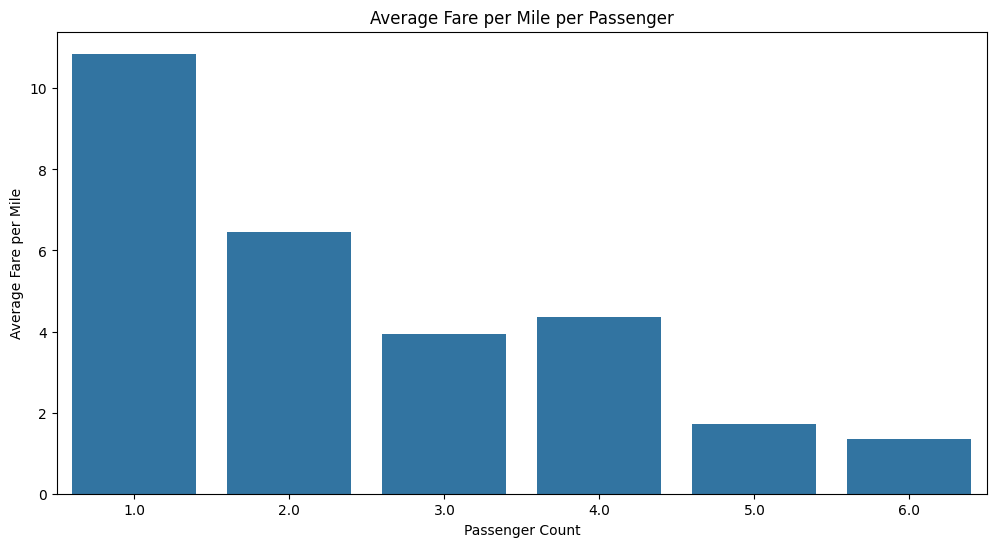

In [74]:
# Analyse the fare per mile per passenger for different passenger counts
zone_data['fare_per_mile'] = zone_data['fare_amount']/zone_data['trip_distance']
zone_data['fare_per_mile_per_pass'] = zone_data['fare_per_mile']/zone_data['passenger_count']

pass_count_v_fare = zone_data.groupby('passenger_count')['fare_per_mile_per_pass'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(pass_count_v_fare, x='passenger_count', y='fare_per_mile_per_pass')
plt.title('Average Fare per Mile per Passenger')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile')
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

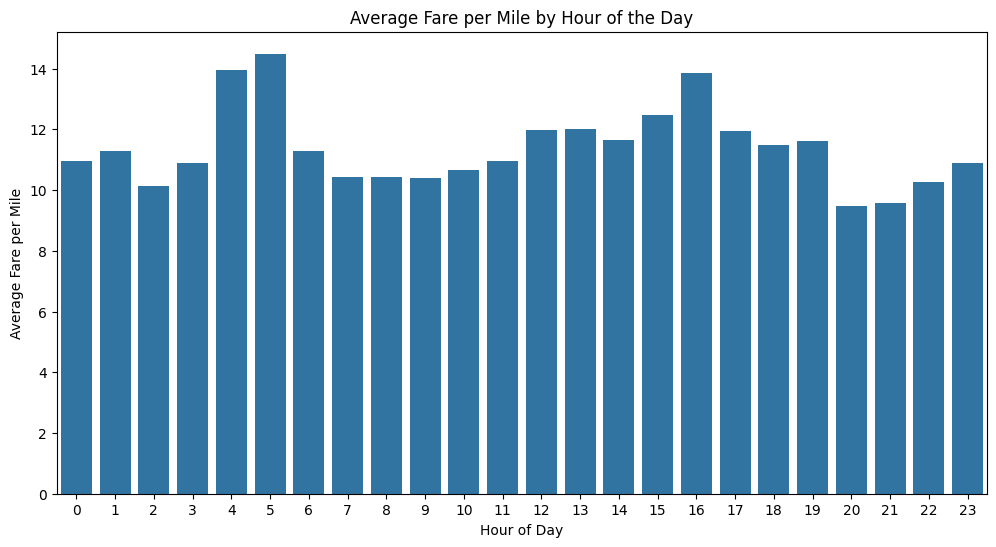

In [75]:
# Compare the average fare per mile for different days and for different times of the day
fare_per_mile_hours = zone_data.groupby('pickup_hour')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')

plt.figure(figsize=(12,6))
sns.barplot(fare_per_mile_hours, x='pickup_hour', y='avg_fare_per_mile')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile')
plt.show()

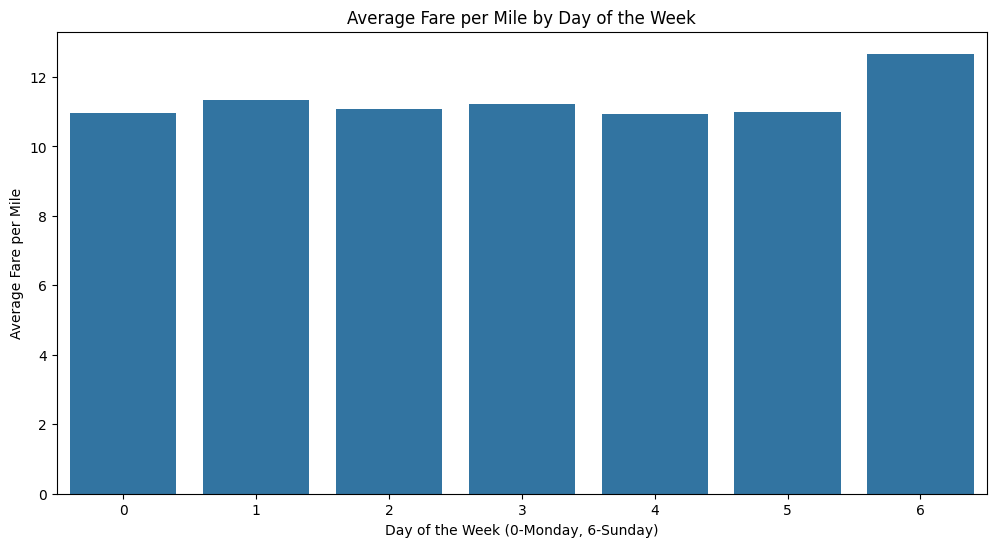

In [76]:
fare_per_mile_days = zone_data.groupby('pickup_weekday')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')

plt.figure(figsize=(12,6))
sns.barplot(fare_per_mile_days, x='pickup_weekday', y='avg_fare_per_mile')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week (0-Monday, 6-Sunday)')
plt.ylabel('Average Fare per Mile')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

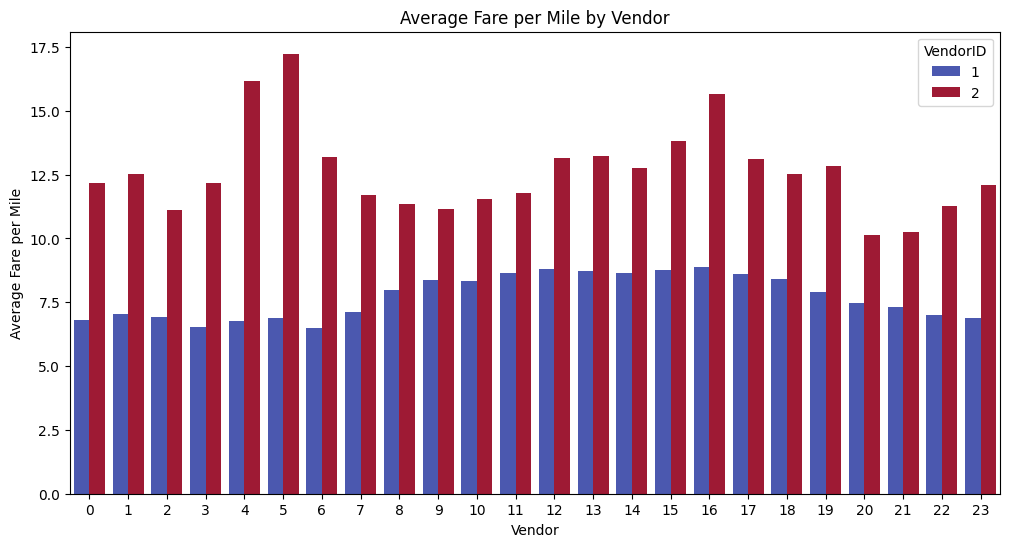

In [77]:
# Compare fare per mile for different vendors
fare_per_mile_vendor = zone_data.groupby(['pickup_hour','VendorID'])['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')

plt.figure(figsize=(12,6))
sns.barplot(fare_per_mile_vendor, x='pickup_hour', y='avg_fare_per_mile', hue='VendorID', palette='coolwarm')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Average Fare per Mile')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


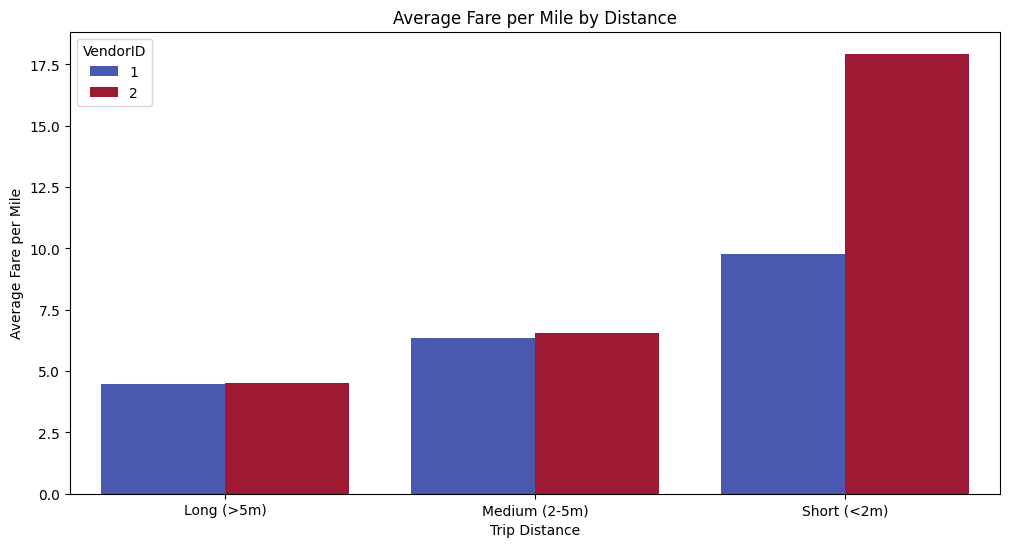

In [78]:
# Defining distance tiers
zone_data['distance_tier'] = 'Long (>5m)'
zone_data.loc[zone_data['trip_distance']<=5, 'distance_tier'] = 'Medium (2-5m)'
zone_data.loc[zone_data['trip_distance']<=2, 'distance_tier'] = 'Short (<2m)'

fare_per_mile_distance = zone_data.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')

plt.figure(figsize=(12,6))
sns.barplot(fare_per_mile_distance, x='distance_tier', y='avg_fare_per_mile', hue='VendorID', palette='coolwarm')
plt.title('Average Fare per Mile by Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Average Fare per Mile')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

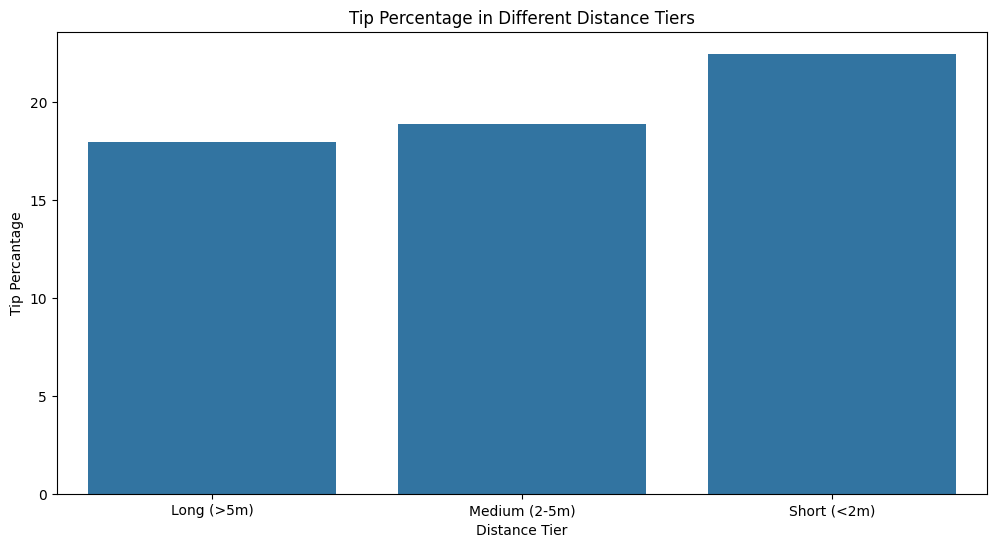

In [79]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
zone_data['tip_pct'] = (zone_data['tip_amount']/zone_data['fare_amount'])*100

distance_v_tip = zone_data.groupby('distance_tier')['tip_pct'].mean().reset_index(name='avg_tip_pct')

plt.figure(figsize=(12,6))
sns.barplot(distance_v_tip, x='distance_tier', y='avg_tip_pct')
plt.title('Tip Percentage in Different Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Tip Percantage')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [80]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
 

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

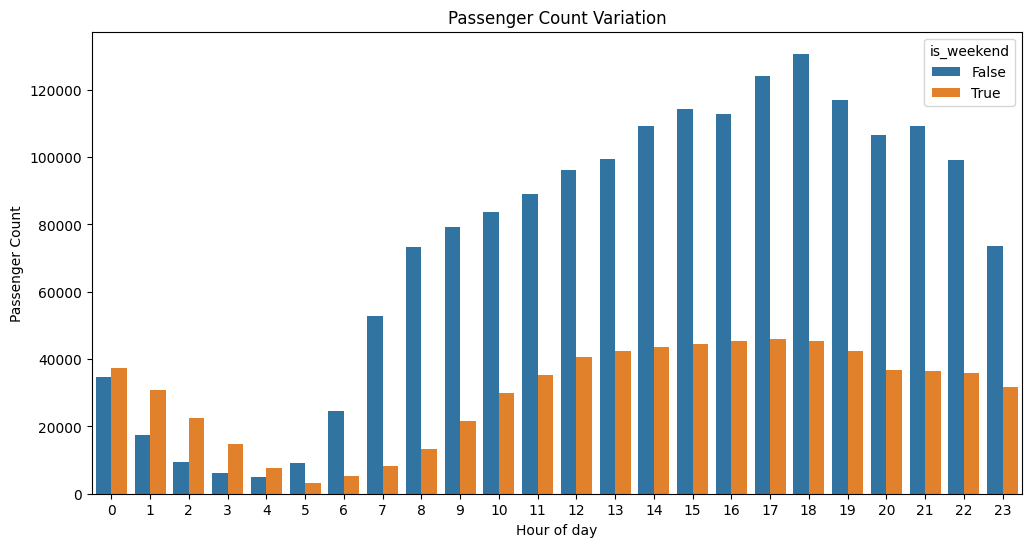

In [81]:
# See how passenger count varies across hours and days
passenger_var_hours = zone_data.groupby(['is_weekend', 'pickup_hour'])['passenger_count'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(passenger_var_hours, x='pickup_hour', y='passenger_count', hue='is_weekend')
plt.title('Passenger Count Variation')
plt.xlabel('Hour of day')
plt.ylabel('Passenger Count')
plt.show()

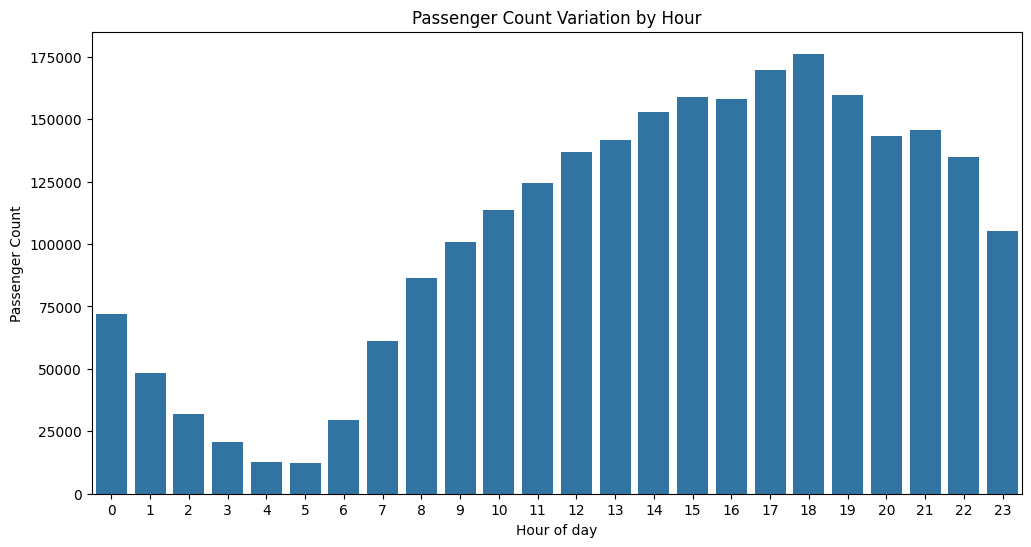

In [82]:
# See how passenger count varies across hours and days
passenger_var_hours = zone_data.groupby(['pickup_hour'])['passenger_count'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(passenger_var_hours, x='pickup_hour', y='passenger_count')
plt.title('Passenger Count Variation by Hour')
plt.xlabel('Hour of day')
plt.ylabel('Passenger Count')
plt.show()

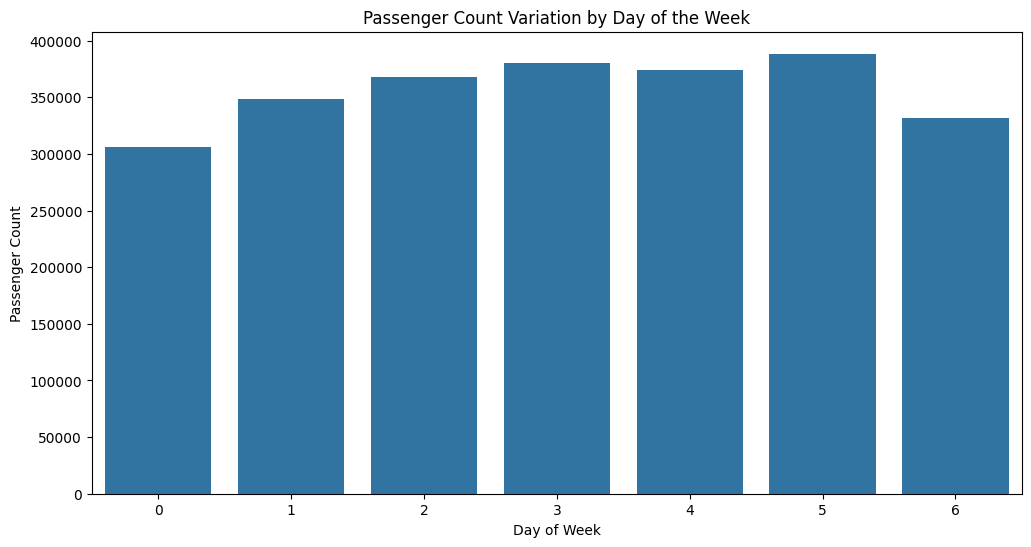

In [83]:
passenger_var_days = zone_data.groupby(['pickup_weekday'])['passenger_count'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(passenger_var_days, x='pickup_weekday', y='passenger_count')
plt.title('Passenger Count Variation by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Passenger Count')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

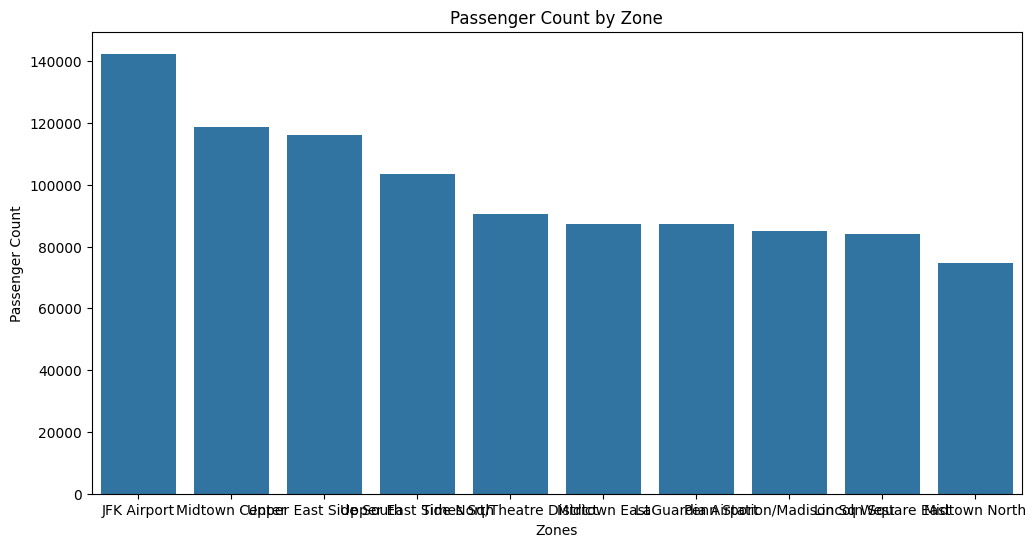

In [84]:
# How does passenger count vary across zones
passenger_var_zone = zone_data.groupby('pickup_zone')['passenger_count'].sum().reset_index().sort_values(by='passenger_count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(passenger_var_zone.head(10), x='pickup_zone', y='passenger_count')
plt.title('Passenger Count by Zone')
plt.xlabel('Zones')
plt.ylabel('Passenger Count')
plt.show()

In [85]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_map = zones_map.merge(passenger_var_zone, how='left', left_on='pickup_zone', right_on='pickup_zone').sort_values(by='passenger_count', ascending=False)

zones_map

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,pickup_zone,num_trips,passenger_count
131,132,0.25,0.00,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",JFK Airport,94859.00,142388.00
160,161,0.04,0.00,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",Midtown Center,85375.00,118822.00
236,237,0.04,0.00,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",Upper East Side South,86398.00,115968.00
235,236,0.04,0.00,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",Upper East Side North,77038.00,103583.00
229,230,0.03,0.00,Times Sq/Theatre District,230,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21...",Times Sq/Theatre District,60602.00,90576.00
...,...,...,...,...,...,...,...,...,...,...
109,110,0.10,0.00,Great Kills Park,110,Staten Island,"POLYGON ((951420.092 139894.411, 951856.209 13...",NaN,NaN,NaN
175,176,0.15,0.00,Oakwood,176,Staten Island,"POLYGON ((950393.94 148827.195, 950393.983 148...",NaN,NaN,NaN
213,214,0.14,0.00,South Beach/Dongan Hills,214,Staten Island,"POLYGON ((960669.201 156319.132, 960902.551 15...",NaN,NaN,NaN
220,221,0.17,0.00,Stapleton,221,Staten Island,"POLYGON ((963349.728 171627.581, 963397.759 17...",NaN,NaN,NaN


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [86]:
# How often is each surcharge applied?
surcharge_cols = ['congestion_surcharge', 'improvement_surcharge', 'airport_fee']
for col in surcharge_cols:
    count = (zone_data[col] > 0).sum()
    print(f"{col} applied in {count} trips ({count/len(zone_data)*100:.2f}%)")

congestion_surcharge applied in 1680394 trips (93.39%)
improvement_surcharge applied in 1799246 trips (100.00%)
airport_fee applied in 159091 trips (8.84%)


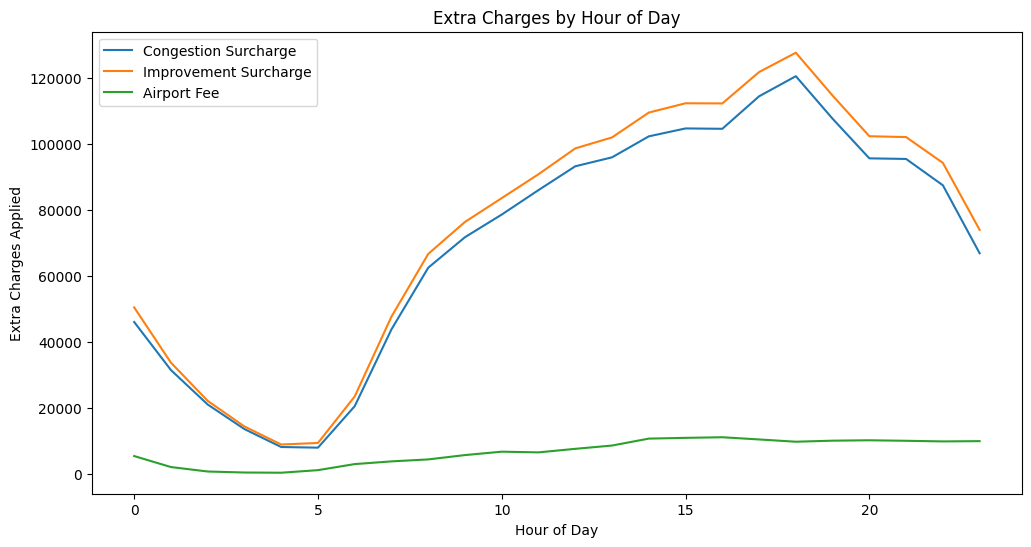

In [87]:
extra_charges = zone_data.groupby('pickup_hour')[surcharge_cols].apply(lambda x: (x > 0).sum()).reset_index()

plt.figure(figsize=(12,6))
plt.plot(extra_charges['pickup_hour'], extra_charges['congestion_surcharge'], label='Congestion Surcharge')
plt.plot(extra_charges['pickup_hour'], extra_charges['improvement_surcharge'], label='Improvement Surcharge')
plt.plot(extra_charges['pickup_hour'], extra_charges['airport_fee'], label='Airport Fee')
plt.title('Extra Charges by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Extra Charges Applied')
plt.legend()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [88]:
print("""Analysis shows that the hours between 3pm and 7pm, with the number of trips peaking at 6pm. We see high number of pickups from Midtown Center and JFK Airport in the same time frame.
Deploying a higher number of taxis in these areas 30 minutes prior to the evening rush could meet the demand surge. Also, suggesting alternative routes could help mitigate traffic congestions during this period.""")

Analysis shows that the hours between 3pm and 7pm, with the number of trips peaking at 6pm. We see high number of pickups from Midtown Center and JFK Airport in the same time frame.
Deploying a higher number of taxis in these areas 30 minutes prior to the evening rush could meet the demand surge. Also, suggesting alternative routes could help mitigate traffic congestions during this period.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [89]:
print("""JFK Airport and Midtown Center are high-revenue zones and likely have a high wait-time. Maintaining a dedicated fleet at airports on during Thursday evenings and Sunday afternoons/evenings could mitigate this. 
During off-peak weekday mornings, drivers could be deployed in residential zones, instead of airport queues.
Pickup hotspots shift to late-night on weekends. Fleet concentration can be shifted to entertainment districts like East Village and Clinton East starting 9:00 PM on Fridays and Saturdays to capture the "night out" crowd.""")

JFK Airport and Midtown Center are high-revenue zones and likely have a high wait-time. Maintaining a dedicated fleet at airports on during Thursday evenings and Sunday afternoons/evenings could mitigate this. 
During off-peak weekday mornings, drivers could be deployed in residential zones, instead of airport queues.
Pickup hotspots shift to late-night on weekends. Fleet concentration can be shifted to entertainment districts like East Village and Clinton East starting 9:00 PM on Fridays and Saturdays to capture the "night out" crowd.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [90]:
print("""Short trips can be prioritized over long distance during low-demand hours (11AM to 3PM) as short trips often have higher fare-per-mile yields. Deploying fleets in high-density residential areas like Upper East Side to perform volume-based short trips, accumulate revenue faster than a single long trip.
Cabs can be equipped with a system that suggests default tips when passengers pay with credit cards.""")

Short trips can be prioritized over long distance during low-demand hours (11AM to 3PM) as short trips often have higher fare-per-mile yields. Deploying fleets in high-density residential areas like Upper East Side to perform volume-based short trips, accumulate revenue faster than a single long trip.
Cabs can be equipped with a system that suggests default tips when passengers pay with credit cards.
